In [3]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip
import matplotlib.pyplot as plt 
with gzip.open("/Users/zed/VSCode/regana/iceberg/2020-05-20.pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()

data = cPickle.loads(raw_data)


In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [2]:
data

,time,last,volume,ask_0_p,ask_0_v,ask_1_p,ask_1_v,ask_2_p,ask_2_v,ask_3_p,...,intra.time,ask.qty,bid.qty,bid,ask,wpr,next.bid,next.ask,wpr.ret,ret
0,2020-05-20T00:00:02.442489Z,9786.5,500,9787.0,994865,9787.5,3393,9788.0,770,9788.5,...,00:00:02,196582.6,171258.6,9786.5,9787.0,9786.732789,9786.5,9787.0,0.000000,0.000000e+00
1,2020-05-20T00:00:02.951589Z,9786.5,520,9787.0,990080,9787.5,3199,9788.0,964,9788.5,...,00:00:02,193192.6,171236.3,9786.5,9787.0,9786.734938,9786.5,9787.0,0.002149,2.195934e-07
2,2020-05-20T00:00:03.457557Z,9786.5,10514,9787.0,970490,9787.5,3199,9788.0,994,9788.5,...,00:00:03,191250.1,172460.7,9786.5,9787.0,9786.737085,9786.5,9787.0,0.002147,2.193847e-07
3,2020-05-20T00:00:03.964627Z,9786.5,31409,9787.0,889304,9787.5,3199,9788.0,994,9788.5,...,00:00:03,186024.8,175512.6,9786.5,9787.0,9786.742731,9786.5,9787.0,0.005646,5.769003e-07
4,2020-05-20T00:00:04.513139Z,9786.5,15527,9787.0,895348,9787.5,3393,9788.0,770,9788.5,...,00:00:04,186453.3,166707.4,9786.5,9787.0,9786.736022,9786.5,9787.0,-0.006709,-6.855081e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155139,2020-05-20T23:59:57.430395Z,9505.0,1000,9505.5,951939,9506.0,65171,9506.5,8335,9507.0,...,23:59:57,138410.0,60601.8,9505.0,9505.5,9505.152257,9505.0,9505.5,-0.000175,-1.837395e-08
155140,2020-05-20T23:59:57.987467Z,9505.0,0,9505.5,961439,9506.0,65171,9506.5,8335,9507.0,...,23:59:57,139360.0,61233.2,9505.0,9505.5,9505.152630,9505.0,9505.5,0.000373,3.929423e-08
155141,2020-05-20T23:59:58.588483Z,9505.0,900,9505.5,955439,9506.0,65171,9506.5,8335,9507.0,...,23:59:58,138760.0,66938.8,9505.0,9505.5,9505.162711,9505.0,9505.5,0.010080,1.060521e-06
155142,2020-05-20T23:59:59.088793Z,9505.0,0,9505.5,955439,9506.0,65171,9506.5,8335,9507.0,...,23:59:59,138760.0,66938.8,9505.0,9505.5,9505.162711,9505.0,9505.5,0.000000,0.000000e+00


In [5]:
data.columns 

Index(['time', 'last', 'volume', 'ask_0_p', 'ask_0_v', 'ask_1_p', 'ask_1_v',
       'ask_2_p', 'ask_2_v', 'ask_3_p', 'ask_3_v', 'ask_4_p', 'ask_4_v',
       'ask_5_p', 'ask_5_v', 'ask_6_p', 'ask_6_v', 'ask_7_p', 'ask_7_v',
       'ask_8_p', 'ask_8_v', 'ask_9_p', 'ask_9_v', 'bid_0_p', 'bid_0_v',
       'bid_1_p', 'bid_1_v', 'bid_2_p', 'bid_2_v', 'bid_3_p', 'bid_3_v',
       'bid_4_p', 'bid_4_v', 'bid_5_p', 'bid_5_v', 'bid_6_p', 'bid_6_v',
       'bid_7_p', 'bid_7_v', 'bid_8_p', 'bid_8_v', 'bid_9_p', 'bid_9_v',
       'timestamp', 'intra.time', 'ask.qty', 'bid.qty', 'bid', 'ask', 'wpr',
       'next.bid', 'next.ask', 'wpr.ret', 'ret'],
      dtype='object')

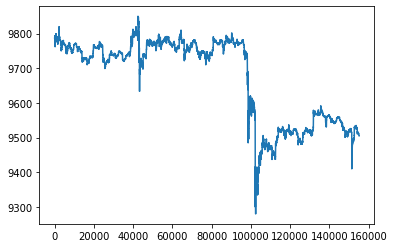

In [4]:
plt.plot(data['last'])

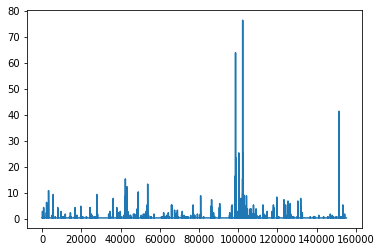

In [12]:
plt.plot(data['next.ask']-data['next.bid'])
# plt.plot(data['next.bid'])

In [1]:
import numpy as np 